In [10]:
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputClassifier
import numpy as np
import pandas as pd
import sklearn
from  sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score,confusion_matrix
from  sklearn.tree import DecisionTreeClassifier
import array


In [11]:
names = ['Nr. Sensors','Fuel/100Km','Max velocity','Nr. Tires','Model Year','Master']

In [361]:
df = pd.read_csv('Leading_Truck.csv')
df.head()

,Nr. Sensors,Fuel/ 100Km,Max velocity,Nr. Tires,Model Year,Master
0,16,38,67,10,20,0
1,33,36,64,16,19,1
2,31,39,78,10,21,0
3,30,31,73,12,15,0
4,10,32,64,10,18,0


In [13]:
df.head(10)

,Nr. Sensors,Fuel/ 100Km,Max velocity,Nr. Tires,Model Year,Master
0,16,38,67,10,20,0
1,33,36,64,16,19,1
2,31,39,78,10,21,0
3,30,31,73,12,15,0
4,10,32,64,10,18,0
5,18,32,62,4,15,0
6,34,35,74,16,20,1
7,13,45,61,4,19,0
8,17,31,77,18,19,0
9,17,35,52,16,17,0


In [14]:
df.shape

(18, 6)

In [15]:
df.describe()

,Nr. Sensors,Fuel/ 100Km,Max velocity,Nr. Tires,Model Year,Master
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,22.611111,37.944444,67.611111,12.555556,18.055556,0.222222
std,8.030375,7.549618,10.483258,5.170302,1.862074,0.427793
min,10.000000,28.000000,50.000000,4.000000,15.000000,0.000000
25%,17.000000,32.000000,62.000000,10.000000,17.000000,0.000000
50%,21.000000,35.500000,69.000000,12.000000,18.500000,0.000000
75%,30.000000,42.000000,73.750000,16.000000,19.750000,0.000000
max,34.000000,53.000000,90.000000,22.000000,21.000000,1.000000


In [16]:
df.columns

Index(['Nr. Sensors', 'Fuel/ 100Km', 'Max velocity', 'Nr. Tires', 'Model Year',
       'Master'],
      dtype='object')

In [17]:
df.groupby('Master').size()

Master
0    14
1     4
dtype: int64

In [18]:
data = df.values
data[0:5]

array([[16, 38, 67, 10, 20,  0],
       [33, 36, 64, 16, 19,  1],
       [31, 39, 78, 10, 21,  0],
       [30, 31, 73, 12, 15,  0],
       [10, 32, 64, 10, 18,  0]])

<AxesSubplot:>

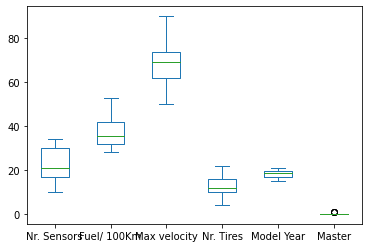

In [19]:
df.plot(kind='box', subplots=False, sharex=False, sharey=False)

In [379]:
clean_data = df.copy()
clean_data ['HIGH'] = (clean_data['Nr. Sensors'] > 20) *1
clean_data ['HIGH'].head()

clean_data ['HIGH'].head()

0    0
1    1
2    1
3    1
4    0
Name: HIGH, dtype: int64

In [359]:
y = clean_data[['HIGH']].copy()
y.head()

,HIGH
0,0
1,1
2,1
3,1
4,0


In [380]:
truck_features = ['Max velocity','Nr. Tires','Model Year','Master']
x=clean_data[truck_features].copy()
x.columns


Index(['Max velocity', 'Nr. Tires', 'Model Year', 'Master'], dtype='object')

In [383]:
y.columns


Index(['HIGH'], dtype='object')

In [445]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.3, random_state=6)

In [446]:
model = DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)

In [447]:
model = model.fit(X_train, Y_train)

In [448]:
accuracy = model.score(X_test, Y_test)*100
print(accuracy)

50.0


In [449]:

predictions = model.predict([[16,38,67,10]])
print(predictions)

[1]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
